Logistic Regression
=========================

## One-vs-All for digit recognition using a subset of the MNIST dataset 

*This example uses the One-vs-All Logistic Regression method to classify handwritten digits as given in the MNIST dataset. Here we only assess the accuracy on the training set and not on (unseen) test data*

### Import libraries 
We will mostly be using numpy for mathematical operations and matplotlib to produce plots. Scipy is used for optimisation and loading MAT files.

In [24]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy.optimize as opt     
import scipy.io as sio            # for loading MAT files

### Load Data

In [25]:
# Load MAT file
mat = sio.loadmat("../data/digit_data")
'''	
    5000 Trainning examples
    20x20 pixels in each (400)
    Headers: 'X'(5000,400), 'y'(5000)
'''
X = mat['X']
y = mat['y'].flatten() # y should of of shape (m,) NOT (m,1) - the scipy optimiser will not work otherwise

# Size of dataset
m = np.shape(X)[0] # samples
n = np.shape(X)[1] # features 

### Display Examples

In [26]:
def displayData(X):

    # Create a greyscale image of the digits (m^(1/2))x(m^(1/2))
    example_width = int(round(np.sqrt(np.size(X, 1))))

    # samples, features
    [m,n] = np.shape(X)

    example_height = (n/example_width)

    # display grid dim
    disp_rows = np.floor(np.sqrt(m))
    disp_cols = np.ceil(m / disp_rows)

    # padding between images
    pad = 1

    # Array to display
    display_area = np.array(np.ones((int(pad + disp_rows * (example_height + pad)),
                                    int(pad + disp_cols * (example_width + pad)	 ))) )



    # wrap each example into a patch
    cur_ex = 0 
    for j in xrange(int(disp_rows)):
        for i in xrange(int(disp_cols)):

            # patch data
            patch = np.reshape(X[cur_ex,:],(example_height,example_width),order="F")

            # load into array
            yidx = ((j+1)*pad) + (example_height*j) 
            xidx = ((i+1)*pad) + (example_width*i)
            display_area[yidx:yidx+example_height,xidx:xidx+example_width] = patch

            cur_ex+=1
            if cur_ex > m:
                break

    # Display as a Matplotlib image
    plt.imshow(display_area,cmap='gray')
    plt.show()

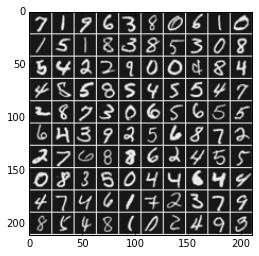

In [27]:
# Randomly select 100 data points to display
rand_indices = np.random.permutation(m);
sel = X[rand_indices[0:100], :]

# Display the randomly selected digits
displayData(sel)

### Sigmoid Activation Function

$g(z) = \frac{1}{1+e^{-z}}$

In [28]:
def sigmoid(z):
    return np.divide(1.0, (np.add(1.0,np.exp(-z)) ) )

### Cost Function and Gradient

$h_{\theta}(x) = g(\theta^T x)$

$J(\theta) = \frac{1}{m} \sum^m_{i=1} [-y^{(i)} log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1-h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum^n_{j=1} \theta_j^2$

$\frac{\delta J(\theta)}{\delta \theta_j} = \frac{1}{m} \sum^m_{i=1} (h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)} \hspace{3.8cm}$ for $j=0$

$\frac{\delta J(\theta)}{\delta \theta_j} = (\frac{1}{m} \sum^m_{i=1} (h_{\theta} (x^{(i)}) - y^{(i)})x_j^{(i)}) + \frac{\lambda}{2m} \theta_j^2 \hspace{2cm}$ for $j\geq 1$

In [29]:
def costFunc(theta,X,y,m,Lambda):
    H = sigmoid(np.dot(X,theta))
    T = y * np.transpose(np.log( H )) + (1-y) * np.transpose(np.log( 1 - H ))
    reg = ( float(Lambda) / (2*m)) * np.power(theta[1:theta.shape[0]],2).sum()
    return -(1./m)*T.sum() + reg


def gradFunc(theta,X,y,m,Lambda):
    theta_reg = np.array([np.insert(theta[1:len(theta)],0,0)])
    H = sigmoid(np.dot(X,theta))
    grad = (1./m) * np.dot(H.T - y, X).T + ( float(Lambda) / m )*theta_reg
    return grad.flatten()

### One-vs-All

In [30]:
def oneVall(X,y,num_labels,Lambda,m,n):
    all_theta = np.array(np.zeros((num_labels,n+1)))

    for c in xrange(num_labels):
        initial_theta = np.zeros((n+1,1))
        args = (X,(y%10==c).astype(int),float(m),Lambda)
        all_theta[c,:] = opt.minimize(costFunc, x0=initial_theta, args=args, 
                                      options={'disp': False, 'maxiter':13}, method="Newton-CG", jac=gradFunc)["x"]

    return all_theta

In [31]:
# Add ones to X matrix
X = np.column_stack((np.ones(m),X))
num_labels = 10
Lambda = 0.1
all_theta = oneVall(X,y,num_labels,Lambda,m,n)

### Prediction

In [32]:
def pred_oneVall(all_theta,X):
    if X.ndim == 1:
        X = np.reshape(X, (-1,X.shape[0]))
    return np.argmax(sigmoid( np.dot(X,all_theta.T) ), axis=1)

In [33]:
print "Accuracy on Training Set: ", np.mean(pred_oneVall(all_theta,X) == y%10)*100.0, "%" 

Accuracy on Training Set:  96.18 %


### Display and Predict

In [34]:
def displaydigit(idx,X):

    pixels = X[idx,1:]
    digit = np.reshape(pixels, (20,20),order='F')
    plt.imshow(digit,cmap='gray')
    plt.show()

Logisitic Regression Prediction: 2 (actual digit 2)


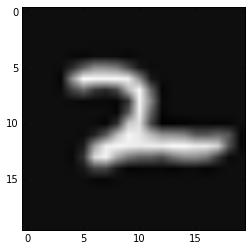

Logisitic Regression Prediction: 0 (actual digit 0)


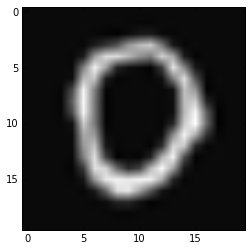

Logisitic Regression Prediction: 2 (actual digit 2)


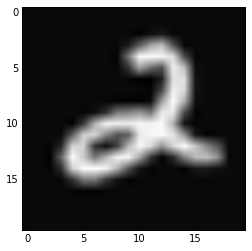

Logisitic Regression Prediction: 9 (actual digit 9)


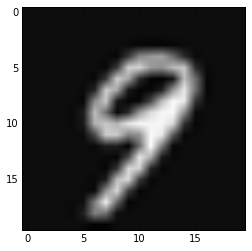

Logisitic Regression Prediction: 6 (actual digit 6)


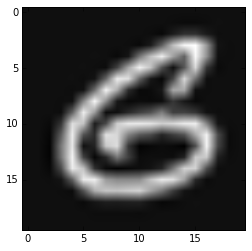

Logisitic Regression Prediction: 6 (actual digit 6)


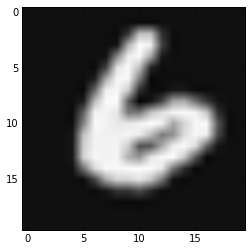

Logisitic Regression Prediction: 7 (actual digit 9)


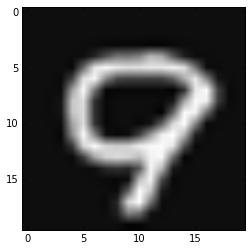

Logisitic Regression Prediction: 8 (actual digit 8)


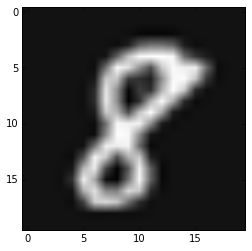

Logisitic Regression Prediction: 3 (actual digit 3)


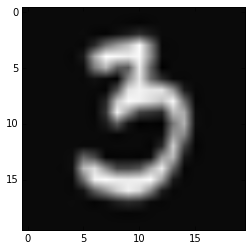

Logisitic Regression Prediction: 5 (actual digit 5)


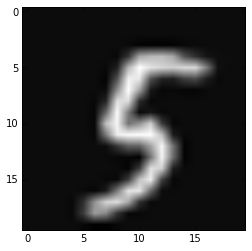

In [35]:
# Display samples and predict
rp = np.random.permutation(X.shape[0])
dispsamps = 10 # number of samples to display
for i in xrange(dispsamps):
    pred = pred_oneVall(all_theta,X[rp[i],:])
    print('Logisitic Regression Prediction: {:d} (actual digit {:d})'.format((pred[0])%10, y[rp[i]]%10)) 
    displaydigit(rp[i], X)